# ***Clasificarea melodiilor in functie de genurile muzicale folosind KNN***

In [1]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
import os
import pickle
import random 
import operator
import librosa
import librosa.display
import matplotlib.pyplot as plt
from collections import defaultdict
from tkinter import filedialog
import IPython

### 1.   *Fisierul audio*



In [2]:
file_path = filedialog.askopenfilename()
y, sr = librosa.core.load(file_path)
IPython.display.Audio(y, rate=sr)

### 2.   *Reprezentarea grafica a undelor unui semnal sonor in functie de timp si amplitudine*
*Aceste reprezentari ne permit sa analizam rapid datele audio, sa comparam vizual si sa constatam asemenarile dintre anumite genuri*


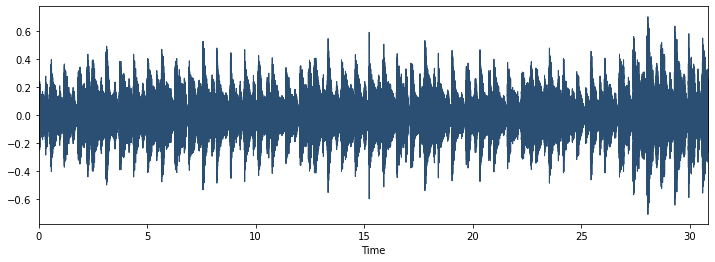

In [3]:
data, sr=librosa.load(file_path)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data,color="#2B4F72")
plt.show()

## 3.   *Spectograma*
*Aceasta este o modalitate vizuala de a reprezenta intensitatea unui semnal in timp la diferite frecvente intr-o anumita forma de unda, dar si variatia in timp a nivelurilor de energie.*



Text(0.5, 1.0, 'SPECTROGRAM')

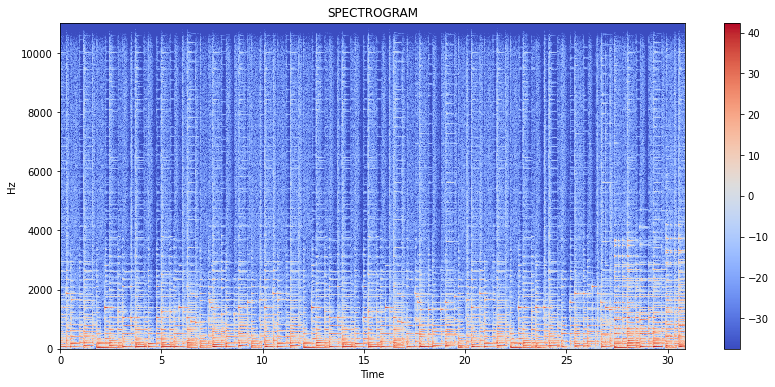

In [4]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time',y_axis='hz')
plt.colorbar()
plt.title('SPECTROGRAM')



## 4.   *K-nearest neighbors algorithm*
*Vom folosi algoritmul celor mai apropiati K vecini deoarece acesta ofera cele mai bune rezultate pentru problema noastra. KNN este un machine learning algoritm popular pentru clasificare si recunoastere.*





*   Definim o functie care obtine distanta dintre caracteristicile vectorilor si gaseste vecinii:

In [2]:
def getNeighbors(trainingSet, instance, k):
    distances = []
    for x in range (len(trainingSet)):
        dist = distance(trainingSet[x], instance, k )+ distance(instance, trainingSet[x], k)
        distances.append((trainingSet[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

*   Identificarea celui mai apropiat vecin:

In [3]:
def nearestClass(neighbors):
    classVote = {}

    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response]+=1 
        else:
            classVote[response]=1

    sorter = sorted(classVote.items(), key = operator.itemgetter(1), reverse=True)
    return sorter[0][0]



*   Evaluarea acuratetii



In [4]:
def getAccuracy(testSet, predictions):
  correct=0
  for x in range (len(testSet)):
    if testSet[x][-1]==predictions[x]:
      correct+=1
  return 1.0*correct/len(testSet)

* Calcularea distantei intre vecinii lui k

In [5]:
def distance(instance1 , instance2 , k ):
    distance =0 
    mm1 = instance1[0] 
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1)) 
    distance+=(np.dot(np.dot((mm2-mm1).transpose() , np.linalg.inv(cm2)) , mm2-mm1 )) 
    distance+= np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance-= k
    return distance



*   Testarea pe setul de date



In [32]:
def loadDataset(filename , split , trSet , teSet):
    with open("my.dat" , 'rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break  

    for x in range(len(dataset)):
        if random.random() <split :      
            trSet.append(dataset[x])
        else:
            teSet.append(dataset[x])

* Incarcarea setului complet de date

In [6]:
def loadDataset(filename):
    with open("my.dat" , 'rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break
            



*   Se imparte baza de antrenament in set de antrenament mai mic si un set de testare pt obtinerea acuratetii



In [33]:
dataset = [] 
trainingSet = []
testSet = []
loadDataset("my.dat" , 0.66, trainingSet, testSet)



*   Facem predictia utilizand KNN si obtinem acuratetea datelor de testare



In [34]:
leng = len(testSet)
predictions = []
for x in range (leng): predictions.append(nearestClass(getNeighbors(trainingSet ,testSet[x] , 3))) 
accuracy1 = getAccuracy(testSet , predictions)
print(accuracy1)

0.695906432748538




*   Se incarca intreg setul de antrenament pentru a putea fi testat algoritmul cu exemple date de utilizator



In [7]:
dataset = []
loadDataset("my.dat")
results=defaultdict(int)
i=1
for folder in os.listdir("genres/gen"):
    results[i]=folder
    i+=1



*   Se deschide o fereastra de dialog, se alege o melodie de intrare si se fac calculele pentru a determina genul



In [8]:
file_path = filedialog.askopenfilename()
(rate,sig)=wav.read(file_path)
mfcc_feat=mfcc(sig,rate,winlen=0.020,appendEnergy=False)
covariance = np.cov(np.matrix.transpose(mfcc_feat))
mean_matrix = mfcc_feat.mean(0)
feature=(mean_matrix,covariance,0)
pred=nearestClass(getNeighbors(dataset ,feature , 3))
print(results[pred])

country
